# Some basic statistics on the Akkadian ORACC corpus

In [1]:
import glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Load the data

In [3]:
path =r'output' # indicate the local path where files are stored
allFiles = glob.glob(path + "/*.csv")
list_ = []
files_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['id_text'] = [file_[7:-4].replace('_', '/') + '/' + text for text in df['id_text']]
    df['lemma'] = [lemma.replace('$', '') for lemma in df['lemma']]
    list_.append(df)
    files_.append(file_[7:-4].replace('_', '/'))
data = pd.concat(list_).reset_index(drop=True)

# How many texts are included?

In [4]:
data.shape
#data.iloc[0,1]

(7630, 2)

In [5]:
length = [text[:5] for text in data['lemma']]
length

['ana[t',
 'ana[t',
 'x[NA]',
 'x[NA]',
 'ana[t',
 'Rib-H',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'ana[t',
 'ana[t',
 'x[NA]',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'umma[',
 'ana[t',
 'umma[',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'Rib-H',
 'Rib-H',
 'Rib-H',
 'ana[t',
 'ana[t',
 'Rib-H',
 'ana[t',
 'ana[t',
 'Rib-H',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ṭuppu',
 'ana[t',
 'šanīt',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'šanīt',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',
 'šâlu[',
 'ana[t',
 'ana[t',
 'ana[t',
 'ana[t',


In [6]:
#tokenize the data by splitting on white space. There is no punctuation in this text.
data['tokens'] = data['lemma'].str.split()
data['tokens'][0]

['ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'qabû[say]V',
 'umma[saying]PRP',
 'Milk-ilu[1]PN',
 'wardu[slave]N',
 'eperu[earth]N',
 'ša[of]DET',
 'šēpu[foot]N',
 'ana[to]PRP',
 'šēpu[foot]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 '7-šu[NA]NA',
 '7-ta₂-a-an[NA]NA',
 'maqātu[fall]V',
 'edû[know]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'inūma[when]SBJ',
 'šalmu[intact]AJ',
 'ālu[city]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ša[that]REL',
 'paqādu[entrust]V',
 'ina[in]PRP',
 'qātu[hand]N',
 'u[and]CNJ',
 'awātu[word]N',
 'wabālu[carry]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'ešēru[be(come)-well]V',
 'u[and]CNJ',
 'anumma[now]AV',
 'wuššuru[exempt]AJ',
 'ina[in]PRP',
 'qātu[hand]N',
 'Haya[1]PN',
 '46[NA]NA',
 'wardu[slave]N',
 'u[and]CNJ',
 '5[NA]NA',
 'awīlu[man]N',
 'ṣuhāru[boy]N',
 'u[and]CNJ',
 '5[NA]NA',
 'awīlu[man]N',
 'asīru[captive]N',
 'ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N']

# Data Cleaning
Unlemmatized (broken or unknown) words are represented as, for instance, `x-ši-ka[NA]NA`. Such tokens are essentially placeholders. One may try two different approaches:
- represent all such placeholders by NA
- eliminate all placeholders

In [7]:
data_NA = data.copy()
for i in range(len(data_NA)):
    data_NA['tokens'][i] = [token if not token.endswith('NA]NA') else 'NA' for token in data_NA['tokens'][i]]

In [8]:
for i in range(len(data)):
    data['tokens'][i] = [token for token in data['tokens'][i] if not token.endswith('NA]NA')]

In [9]:
data['tokens'][0]

['ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'qabû[say]V',
 'umma[saying]PRP',
 'Milk-ilu[1]PN',
 'wardu[slave]N',
 'eperu[earth]N',
 'ša[of]DET',
 'šēpu[foot]N',
 'ana[to]PRP',
 'šēpu[foot]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'maqātu[fall]V',
 'edû[know]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'inūma[when]SBJ',
 'šalmu[intact]AJ',
 'ālu[city]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ša[that]REL',
 'paqādu[entrust]V',
 'ina[in]PRP',
 'qātu[hand]N',
 'u[and]CNJ',
 'awātu[word]N',
 'wabālu[carry]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'ešēru[be(come)-well]V',
 'u[and]CNJ',
 'anumma[now]AV',
 'wuššuru[exempt]AJ',
 'ina[in]PRP',
 'qātu[hand]N',
 'Haya[1]PN',
 'wardu[slave]N',
 'u[and]CNJ',
 'awīlu[man]N',
 'ṣuhāru[boy]N',
 'u[and]CNJ',
 'awīlu[man]N',
 'asīru[captive]N',
 'ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N']

In [10]:
data_NA['tokens'][0]

['ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'qabû[say]V',
 'umma[saying]PRP',
 'Milk-ilu[1]PN',
 'wardu[slave]N',
 'eperu[earth]N',
 'ša[of]DET',
 'šēpu[foot]N',
 'ana[to]PRP',
 'šēpu[foot]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'NA',
 'NA',
 'maqātu[fall]V',
 'edû[know]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'inūma[when]SBJ',
 'šalmu[intact]AJ',
 'ālu[city]N',
 'šarru[king]N',
 'bēlu[lord]N',
 'ša[that]REL',
 'paqādu[entrust]V',
 'ina[in]PRP',
 'qātu[hand]N',
 'u[and]CNJ',
 'awātu[word]N',
 'wabālu[carry]V',
 'šarru[king]N',
 'bēlu[lord]N',
 'ilu[god]N',
 'Šamaš[1]DN',
 'ešēru[be(come)-well]V',
 'u[and]CNJ',
 'anumma[now]AV',
 'wuššuru[exempt]AJ',
 'ina[in]PRP',
 'qātu[hand]N',
 'Haya[1]PN',
 'NA',
 'wardu[slave]N',
 'u[and]CNJ',
 'NA',
 'awīlu[man]N',
 'ṣuhāru[boy]N',
 'u[and]CNJ',
 'NA',
 'awīlu[man]N',
 'asīru[captive]N',
 'ana[to]PRP',
 'šarru[king]N',
 'bēlu[lord]N']

In [11]:
# Data Wrangling
import os
import numpy as np
import pandas
import gensim #library needed for word2vec

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE

In [12]:
#fit a word2vec model on the tokenized data, with all the default options
#setting the 'worker' option to 1 should ensure reproducibility
#As per the docs of Gensim, for executing a fully deterministically-reproducible run, 
#you must also limit the model to a single worker thread, 
#to eliminate ordering jitter from OS thread scheduling.

model = gensim.models.Word2Vec(data['tokens'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

In [13]:
#view the 100 element vector for the word 'ēkallu[palace]N'
#each token (not document) has a 100 element vector
model['ēkallu[palace]N']

array([-0.28764075, -0.04904399,  0.73098999, -0.5450657 ,  0.44278136,
        0.3190484 ,  0.77444631,  0.05303477,  0.21365187,  0.27183777,
        0.16957209,  0.45691058,  0.26291749,  0.20394126, -0.50863808,
        0.14111967, -0.15758918, -0.62656462, -0.54534334, -0.71669006,
       -0.04454899,  0.17397325,  0.26252133, -0.35994539, -0.46167663,
        0.39556924,  0.02989869,  0.56858271,  0.42082927, -0.28936964,
       -0.58383113,  0.38377434,  0.20555511,  0.01104323, -0.07902639,
        0.25193286, -0.25393185,  0.13518718,  0.22353283, -0.62752271,
       -0.02227091,  0.26265308,  0.2556558 , -0.17336562,  0.27826005,
       -0.56206375, -0.37987176, -0.36017254, -0.35447231,  0.6997934 ,
       -0.19491778, -1.01845419, -0.424209  ,  0.59690684, -0.00108713,
       -0.48605445, -0.56859994, -0.2817708 ,  0.77775514, -0.49199164,
       -0.26555312, -0.39312246, -0.36604139,  0.72206295, -0.5286364 ,
        0.80605048, -0.4249669 , -0.67166775, -0.23400173, -0.32

In [14]:
# Find cosine distance between two given word vectors
model.similarity('ēkallu[palace]N','bītu[house]N')

0.47231882991393448

In [15]:
#find the 10 most similar vectors to the given word vector
model.most_similar('ēkallu[palace]N')
#model.most_similar('muhhu[skull]N')

[('māšartu[inspection]N', 0.6763904690742493),
 ('tīru[courtier]N', 0.6270608901977539),
 ('muštaʾʾûtu[leisure]N', 0.6092897653579712),
 ('asmiš[in-a-fitting-manner]AV', 0.6078736782073975),
 ('kisirtu[wall-facing]N', 0.5986547470092773),
 ('sekretu[enclosed-(woman)]N', 0.5984169840812683),
 ('nārtu[female-musician]N', 0.5982643961906433),
 ('ēkurru[temple]N', 0.5966708660125732),
 ('hilāni[portico(ed-building)]N', 0.5959400534629822),
 ('ridûtu[appropriation]N', 0.5861530303955078)]

In [16]:
model.similarity('immeru[sheep]N','puhādu[lamb]N')

0.77226969566009651

In [17]:
model.similarity('arhu[cow]N','būru[(bull)-calf]N')

0.7823125293251123

In [18]:
model.similarity('immeru[sheep]N','būru[(bull)-calf]N')

0.72712354891726561

In [19]:
model.most_similar('immeru[sheep]N')

[('alpu[ox]N', 0.7976716160774231),
 ('puhādu[lamb]N', 0.7722696661949158),
 ('hitpu[(an-animal-sacrifice)]N', 0.7686469554901123),
 ('alpu[bull]N', 0.7671318054199219),
 ('yābilu[ram]N', 0.7292606234550476),
 ('balṭu[living]AJ', 0.7285512685775757),
 ('būru[(bull)-calf]N', 0.7271235585212708),
 ('ṣidītu[travel-provisions]N', 0.7186729907989502),
 ('ginû[regular-contribution-(to-temple)]N', 0.716016948223114),
 ('bašlu[cooked]AJ', 0.7098768949508667)]

In [20]:
model.most_similar('arhu[cow]N')

[('tālittu[offspring-of-animals]N', 0.9264601469039917),
 ('lipištu[male-genitalia]N', 0.9253576993942261),
 ('etguru[crossed-over]AJ', 0.9234164953231812),
 ('arītu[pregnant]AJ', 0.9215342402458191),
 ('maṣāru[stride-about?]V', 0.9214375615119934),
 ('ipu[membrane]N', 0.9208890199661255),
 ('ḫurbāšu[frost]N', 0.9180039763450623),
 ('rapādu[(a-disease-of-the-joints?)]N', 0.9156336188316345),
 ('puhpuhhû[squabble]N', 0.9153856635093689),
 ('ḫūṣu[pain]N', 0.9132179021835327)]

In [21]:
#For analogies, use both positive and negative vectors
#this analogy doesn't seem to work
model.most_similar(positive=['arhu[cow]N', 'puhādu[lamb]N'], negative=['immeru[sheep]N'])

[('binītu[creation]N', 0.8645353317260742),
 ('nâlu[lie-down]V', 0.8598955869674683),
 ('kulbābu[ant]N', 0.859760046005249),
 ('rapādu[(a-disease-of-the-joints?)]N', 0.8549306392669678),
 ('epēqu[embrace]V', 0.8490604162216187),
 ('zâbu[dissolve]V', 0.8472409248352051),
 ('šatānu[urinate]V', 0.8405055999755859),
 ('muškēnu[dependant]N', 0.8396285176277161),
 ('qubû[lamentation]N', 0.839551568031311),
 ('ṣurpu[burning]N', 0.8393915295600891)]

In [22]:
#this one works better. I'm at least getting the target word here, "lamb", although it's not the top choice
model.most_similar(positive=['immeru[sheep]N', 'būru[(bull)-calf]N'], negative=['arhu[cow]N'])

[('alpu[bull]N', 0.7293972373008728),
 ('hitpu[(an-animal-sacrifice)]N', 0.6904214024543762),
 ('šīpātu[wool]N', 0.6902130246162415),
 ('puhādu[lamb]N', 0.6855875253677368),
 ('sūtu[unit]N', 0.6805585622787476),
 ('bašlu[cooked]AJ', 0.6797146797180176),
 ('alpu[ox]N', 0.6712541580200195),
 ('paššuru[table]N', 0.6696531772613525),
 ('suluppu[date]N', 0.6585209369659424),
 ('kurru[unit]N', 0.6565209031105042)]

In [23]:
#you can find the most similar vectors to two or more given word vectors.
#Note the brackets here
model.most_similar(['damqu[good]AJ', 'ṭābu[good]AJ'])

[('hadû[joyful]AJ', 0.7923938035964966),
 ('kalûtu[lamentation-priesthood]N', 0.7853044271469116),
 ('bārûtu[lore-of-the-diviner]N', 0.7814344167709351),
 ('šēhu[wind]N', 0.7774344086647034),
 ('damqiš[well]AV', 0.7722551822662354),
 ('šutadduru[constantly-terrified]AJ', 0.7712700366973877),
 ('tūra[again]AV', 0.7693352103233337),
 ('hissatu[understanding]N', 0.7689125537872314),
 ('danniš[very]AV', 0.7634229063987732),
 ('mādiš[greatly]AV', 0.7629337310791016)]

In [66]:
#visualize the 50 most similar vectors to two words meaning 'good'
good_tokens = [token for token,weight in model.most_similar(['damqu[good]AJ','ṭābu[good]AJ'], topn=50)]

In [67]:
vectors = [model[word] for word in good_tokens]

In [68]:
#compute pairwise cosine similarity scores
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [69]:
# Multi-Dimensional Scaling (Project vectors into 2-D)

mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

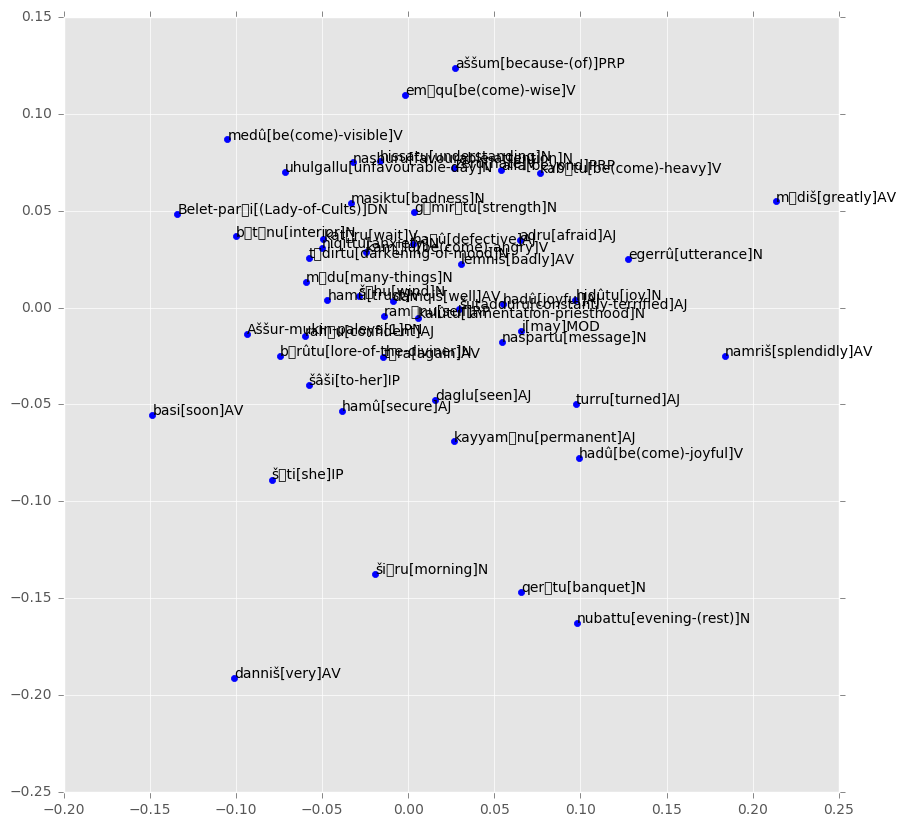

In [70]:
# Fussing with matplotlib

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=1, color='b')
for i in range(len(vectors)):
    ax.annotate(good_tokens[i], ((embeddings[i,0], embeddings[i,1])))

In [71]:
model.most_similar(['lemnu[bad]AJ', 'masku[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.9190999865531921),
 ('alû[(an-evil-demon)]N', 0.9143754243850708),
 ('rusû[dissolution?]N', 0.9113031625747681),
 ('ruhû[sorcery]N', 0.9110234975814819),
 ('asakku[(a-demon-or-illness)]N', 0.9087103605270386),
 ('egû[be(come)-lazy]V', 0.9002764225006104),
 ('arḫiš[quickly]AV', 0.8996142148971558),
 ('kadabbedû[oral-paralysis]N', 0.8977278470993042),
 ('nāsiḫu[one-who-removes]N', 0.8958248496055603),
 ('zēru[hated]AJ', 0.895307183265686)]

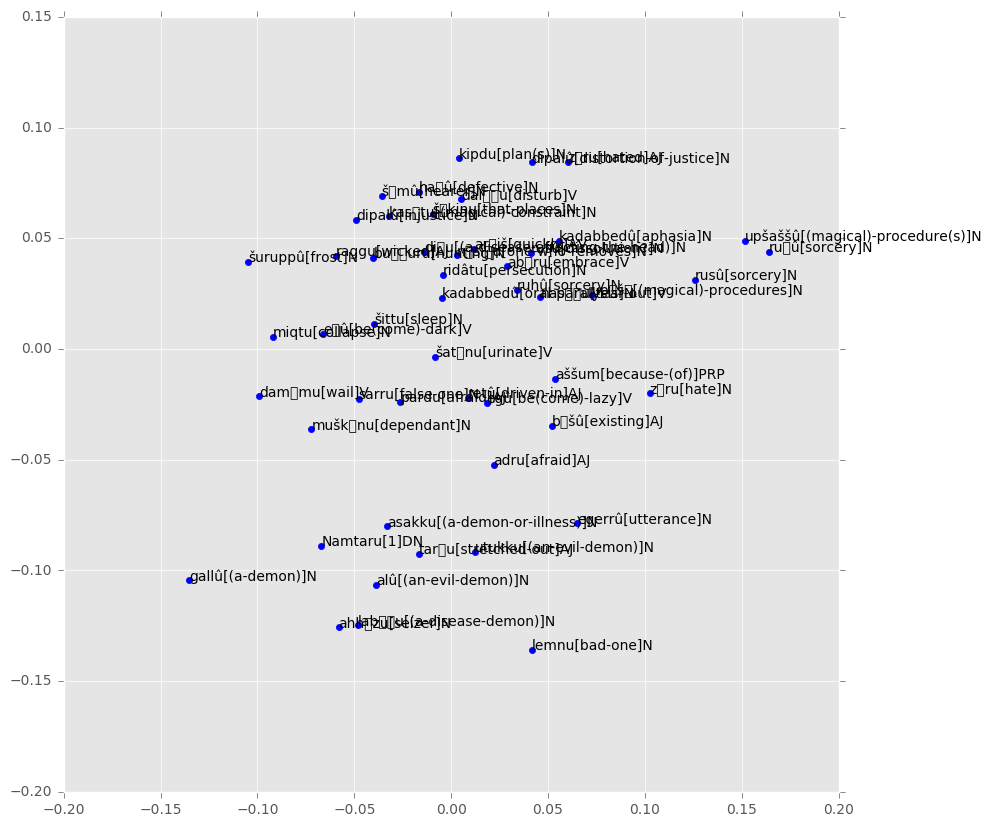

In [72]:
# For comparison, here is the same graph using a vector for words meaning 'bad'

bad_tokens = [token for token,weight in model.most_similar(['lemnu[bad]AJ', 'masku[bad]AJ'], topn=50)]
vectors = [model[word] for word in bad_tokens]
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)
_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=1, color='b')
for i in range(len(vectors)):
    ax.annotate(bad_tokens[i], ((embeddings[i,0], embeddings[i,1])))

In [56]:
#other binaries
#sick and healthy
model.most_similar(['marāṣu[be(come)-ill]V'], topn=10)

[('kīdu[outside]N', 0.9346349239349365),
 ('ašāšu[be(come)-distressed]V', 0.9271955490112305),
 ('ēdēnu[alone]AV', 0.9134163856506348),
 ('kabātu[be(come)-heavy]V', 0.9125210642814636),
 ('salāʾu[sprinkle]V', 0.9090583324432373),
 ('dalāḫu[disturb]V', 0.9087998270988464),
 ('kihullû[mourning-rites]N', 0.9087890386581421),
 ('šūšuru[in-order]AJ', 0.9078075885772705),
 ('ibissû[(financial)-loss]N', 0.9061222672462463),
 ('ūdu[distress]N', 0.9044764041900635)]

In [53]:
#Is there a word for healthy?
model.most_similar(['balāṭu[life]N'], topn=10)

[('šalāmu[be(come)-healty]V', 0.8376455307006836),
 ('isāru[annexe]N', 0.7583286762237549),
 ('rēqu[distant]AJ', 0.7379873394966125),
 ('qiāšu[give]V', 0.7333588600158691),
 ('arāku[be(come)-long]V', 0.7319095134735107),
 ('dāru[era]N', 0.7266884446144104),
 ('šâša[to-her]IP', 0.7217415571212769),
 ('narbû[greatness]N', 0.7186473608016968),
 ('arāku[be-long]V', 0.7185677886009216),
 ('apû[be(come)-visible]V', 0.7170661687850952)]

In [38]:
model.most_similar(['masku[bad]AJ'])

[('kasītu[(magical)-constraint]N', 0.9675261974334717),
 ('haṭû[defective]N', 0.967400074005127),
 ('murtappidu[wandering]AJ', 0.9637789726257324),
 ('pāṭiru[releaser]N', 0.9635305404663086),
 ('pardu[terrifying]AJ', 0.9634495973587036),
 ('dimmatu[wailing]N', 0.9629316926002502),
 ('anāḫu[be(come-tired)]V', 0.9617357850074768),
 ('aḫu[brother]N', 0.960593581199646),
 ('rašû[acquire]N', 0.9599728584289551),
 ('ridâtu[persecution]N', 0.9588865637779236)]

In [39]:
model.most_similar(['lemnu[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.8435544967651367),
 ('alû[(an-evil-demon)]N', 0.8383814096450806),
 ('upšaššû[(magical)-procedure(s)]N', 0.8366623520851135),
 ('ruḫû[sorcery]N', 0.8255094289779663),
 ('lemnu[bad-one]N', 0.8210821151733398),
 ('asakku[(a-demon-or-illness)]N', 0.8103305101394653),
 ('rusû[sorcery]N', 0.8090599775314331),
 ('labāṣu[(a-disease-demon)]N', 0.8071606159210205),
 ('ahhāzu[seizer]N', 0.801917314529419),
 ('gallû[(a-demon)]N', 0.7979066371917725)]

In [40]:
model.most_similar(['masku[bad]AJ','lemnu[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.9190999865531921),
 ('alû[(an-evil-demon)]N', 0.9143754243850708),
 ('rusû[dissolution?]N', 0.9113031625747681),
 ('ruhû[sorcery]N', 0.9110234975814819),
 ('asakku[(a-demon-or-illness)]N', 0.9087103605270386),
 ('egû[be(come)-lazy]V', 0.9002764225006104),
 ('arḫiš[quickly]AV', 0.8996142148971558),
 ('kadabbedû[oral-paralysis]N', 0.8977278470993042),
 ('nāsiḫu[one-who-removes]N', 0.8958248496055603),
 ('zēru[hated]AJ', 0.895307183265686)]

In [43]:
#try to find different senses of the word bad by removing the vector for 'an evil demon'
model.most_similar(positive=['masku[bad]AJ','lemnu[bad]AJ'], negative=['utukku[(an-evil-demon)]N'])

[('zēru[hated]AJ', 0.8249810338020325),
 ('dipalû[distortion-of-justice]N', 0.8142353296279907),
 ('egû[be(come)-lazy]V', 0.7990962266921997),
 ('abāru[embrace]V', 0.794123649597168),
 ('rusû[dissolution?]N', 0.7873398065567017),
 ('ruhû[sorcery]N', 0.7849349975585938),
 ('kadabbedû[aphasia]N', 0.7801993489265442),
 ('haṭû[defective]N', 0.7797009944915771),
 ('rusû[sorcery]N', 0.7781383991241455),
 ('armanniš[like-an-apricot]AV', 0.7780658006668091)]

In [42]:
#remove more vectors to get at different senses of the word 'bad'
model.most_similar(positive=['masku[bad]AJ','lemnu[bad]AJ'], negative=['utukku[(an-evil-demon)]N','dipalû[distortion-of-justice]N'])

[('šāru[wind]N', 0.17059624195098877),
 ('Kiš[Kish]SN', 0.15344417095184326),
 ('šaptu[lip]N', 0.14847055077552795),
 ('Astartu[1]SN', 0.13793325424194336),
 ('pû[mouth]N', 0.13747981190681458),
 ('Nur-abi[1]PN', 0.12036735564470291),
 ('pīhātu[post]N', 0.11644551157951355),
 ('Nippur[1]SN', 0.11487540602684021),
 ('hengallu[plenty]N', 0.10509931296110153),
 ('Kaldayu[Chaldean]EN', 0.10234995186328888)]

My uninformed opinion: there are (at least) four meanings of the word 'bad': Demon and sorcery, distortion of justice, and war/agriculture

In [44]:
#do the same for 'good'
model.most_similar(['damqu[good]AJ', 'ṭābu[good]AJ'])

[('hadû[joyful]AJ', 0.7923938035964966),
 ('kalûtu[lamentation-priesthood]N', 0.7853044271469116),
 ('bārûtu[lore-of-the-diviner]N', 0.7814344167709351),
 ('šēhu[wind]N', 0.7774344086647034),
 ('damqiš[well]AV', 0.7722551822662354),
 ('šutadduru[constantly-terrified]AJ', 0.7712700366973877),
 ('tūra[again]AV', 0.7693352103233337),
 ('hissatu[understanding]N', 0.7689125537872314),
 ('danniš[very]AV', 0.7634229063987732),
 ('mādiš[greatly]AV', 0.7629337310791016)]

In [45]:
model.most_similar(positive=['damqu[good]AJ', 'ṭābu[good]AJ'], negative=['hadû[joyful]AJ'])

[('asu[myrtle]N', 0.5360293388366699),
 ('erīšu[scent]N', 0.5199145674705505),
 ('šurmēnu[cypress]N', 0.5140703916549683),
 ('erēnu[cedar]N', 0.5107691287994385),
 ('igulû[fine-ointment]N', 0.508770227432251),
 ('nubattu[evening-(rest)]N', 0.5046588182449341),
 ('epištu[deed]N', 0.49685853719711304),
 ('mādiš[greatly]AV', 0.4917828440666199),
 ('tiālu[white-cedar]N', 0.48768284916877747),
 ('šanātu[(an-oil-bearing-aromatic-plant)]N', 0.4870699346065521)]

In [46]:
#another binary: big and small?
model.most_similar('rabû[big]AJ')

[('mullilu[purifier]N', 0.6475934982299805),
 ('nīšu[life]N', 0.6402138471603394),
 ('Ninursala[1]DN', 0.6364830732345581),
 ('Tuʾamu[Twins]CN', 0.6361309289932251),
 ('Sebettu[Seven]DN', 0.6297956705093384),
 ('etellu[lord]N', 0.6285824775695801),
 ('waššābu[resident]AJ', 0.6279525756835938),
 ('mehertu[produce]N', 0.626469075679779),
 ('La-tarak[1]DN', 0.6261215209960938),
 ('Amana[Amon]DN', 0.6245540976524353)]

In [47]:
model.most_similar('ṣehru[small]AJ')

[('liwītu[packaging]N', 0.7429136633872986),
 ('nību[naming]N', 0.7234981060028076),
 ('Bit-Barru[1]SN', 0.6834275126457214),
 ('Bit-Zabidiya[1]SN', 0.6428913474082947),
 ('bābtu[city-quarter]N', 0.6424078941345215),
 ('burrû[(a-temple-servant)]N', 0.6403559446334839),
 ('Sarrabanu[1]SN', 0.637455940246582),
 ('Bit-Bunaki[1]SN', 0.6319162845611572),
 ('namkūru[property]N', 0.6299611330032349),
 ('qallu[light]AJ', 0.6201248168945312)]

In [132]:
animals = ['sisû[horse]N', 'immeru[sheep]N', 'imēru[donkey]N', 'alpu[ox]N', 'littu[cow]N', 
           'pīru[elephant]N', 'yābilu[ram]N', 'udru[Bactrian-camel]N', 'damdāmu[(a-kind-of-mule)]N'
           ,'atānu[she-ass]N', 'būru[(bull)-calf]N', 'tuānu[(a-breed-of-horse)]N', 'agālu[donkey]N'
          , 'šullāmu[(a-type-of-horse)]N', 'sugullu[herd]N', 'naṣmadu[harness]N', 'ṣamādu[team]N'
          ,'harbu[plough]N', 'Parsuaya[from-Parsua]EN', 'šulušīu[three-year-old]AJ', 'kīṣu[flayed]AJ'
          ,'bitrumu[very-colourful]AJ', 'buqūmu[plucking]N', 'anāqāte[she-camels]N',
           'udukiutukku[(a-kind-of-sacrificial-sheep)]N', 'maḫirtu[(a-bone-of-the-leg)]N', 'Muṣuraya[Egyptian]EN',
          'gurrutu[ewe]N', 'irginu[(a-breed-or-colour-of-horse)]N', 'ṣummudu[equipped]AJ', 'qummānu[(a-sheep)]N',
           'baqmu[plucked]AJ', 'huzīru[pig]N', 'surrudu[packed-up]AJ', 'pēthallu[riding-horse]N', 'nāmurtu[audience-gift]N', 
           'Manna[Mannea]GN', 'puhādu[lamb]N']
animal_words = model.most_similar(animals, topn=100)
animal_words = [word for word, similarity in animal_words]
animal_words

['lêku[lick-(up)]V',
 'ṣamdu[bound]AJ',
 'gulēnu[cloak]N',
 'sinnutu[brand?]N',
 'Huzaza[1]GN',
 'padakku[grain-silo]N',
 'Tagalagi[1]GN',
 'qullu[(a-large-ring)]N',
 'dakāku[gambol]V',
 'Nabu-ahhe-šullim[1]PN',
 'kurītu[shin]N',
 'šapputu[(a-pottery-vessel)]N',
 'Qarne[1]GN',
 'Issar-remanni[1]PN',
 'Magidu[Megiddo]GN',
 'Hurri[1]EN',
 'Haršaya[1]EN',
 'mešēltu[whetstone]N',
 'buttuqu[cut-off]AJ',
 'Kummuhaya[from-Commagene]EN',
 'lušu[meaning-unknowm]N',
 'suššu[(meaning-unknown)]N',
 'Yaṭbite[1]SN',
 'qudāšu[(ear)ring]N',
 'puquddû[(formal)-delivery]N',
 'narṭabu[soaking-vessel]N',
 'sarāhu[destroy]V',
 'qurpissu[helmet]N',
 'kubbulu[crippled-one]N',
 'tallultu[trappings]N',
 'Metuna[1]SN',
 'Il-natan[1]PN',
 'ittiltu[one-time]AV',
 'tulēmu[(part-of-a-chariot)]N',
 'Dur-Samedi[1]GN',
 'sassu[base]N',
 'muppišu[one-who-does-something]N',
 'kunukku[(cylinder)-seal]N',
 'Buharru[1]GN',
 'Burte[1]GN',
 'sisȗ[horse]N',
 'Kisasi[1]GN',
 'Dana[1]GN',
 'Hinatuna[1]SN',
 'mārû[animal-fattene

In [133]:
x = [model.similarity('sisû[horse]N', word) for word in animals]
y = [model.similarity('immeru[sheep]N', word) for word in animals]
    

# Horses and Sheep
The animal vocabulary may be divided into 'horse-vocabulary' (used for war and often received from foreign countries) and sheep vocabulary. Sheep are domestic animals held for meat and wool and are (relatively) close to other such animals (ox, calf) and words that have to do with wool production.

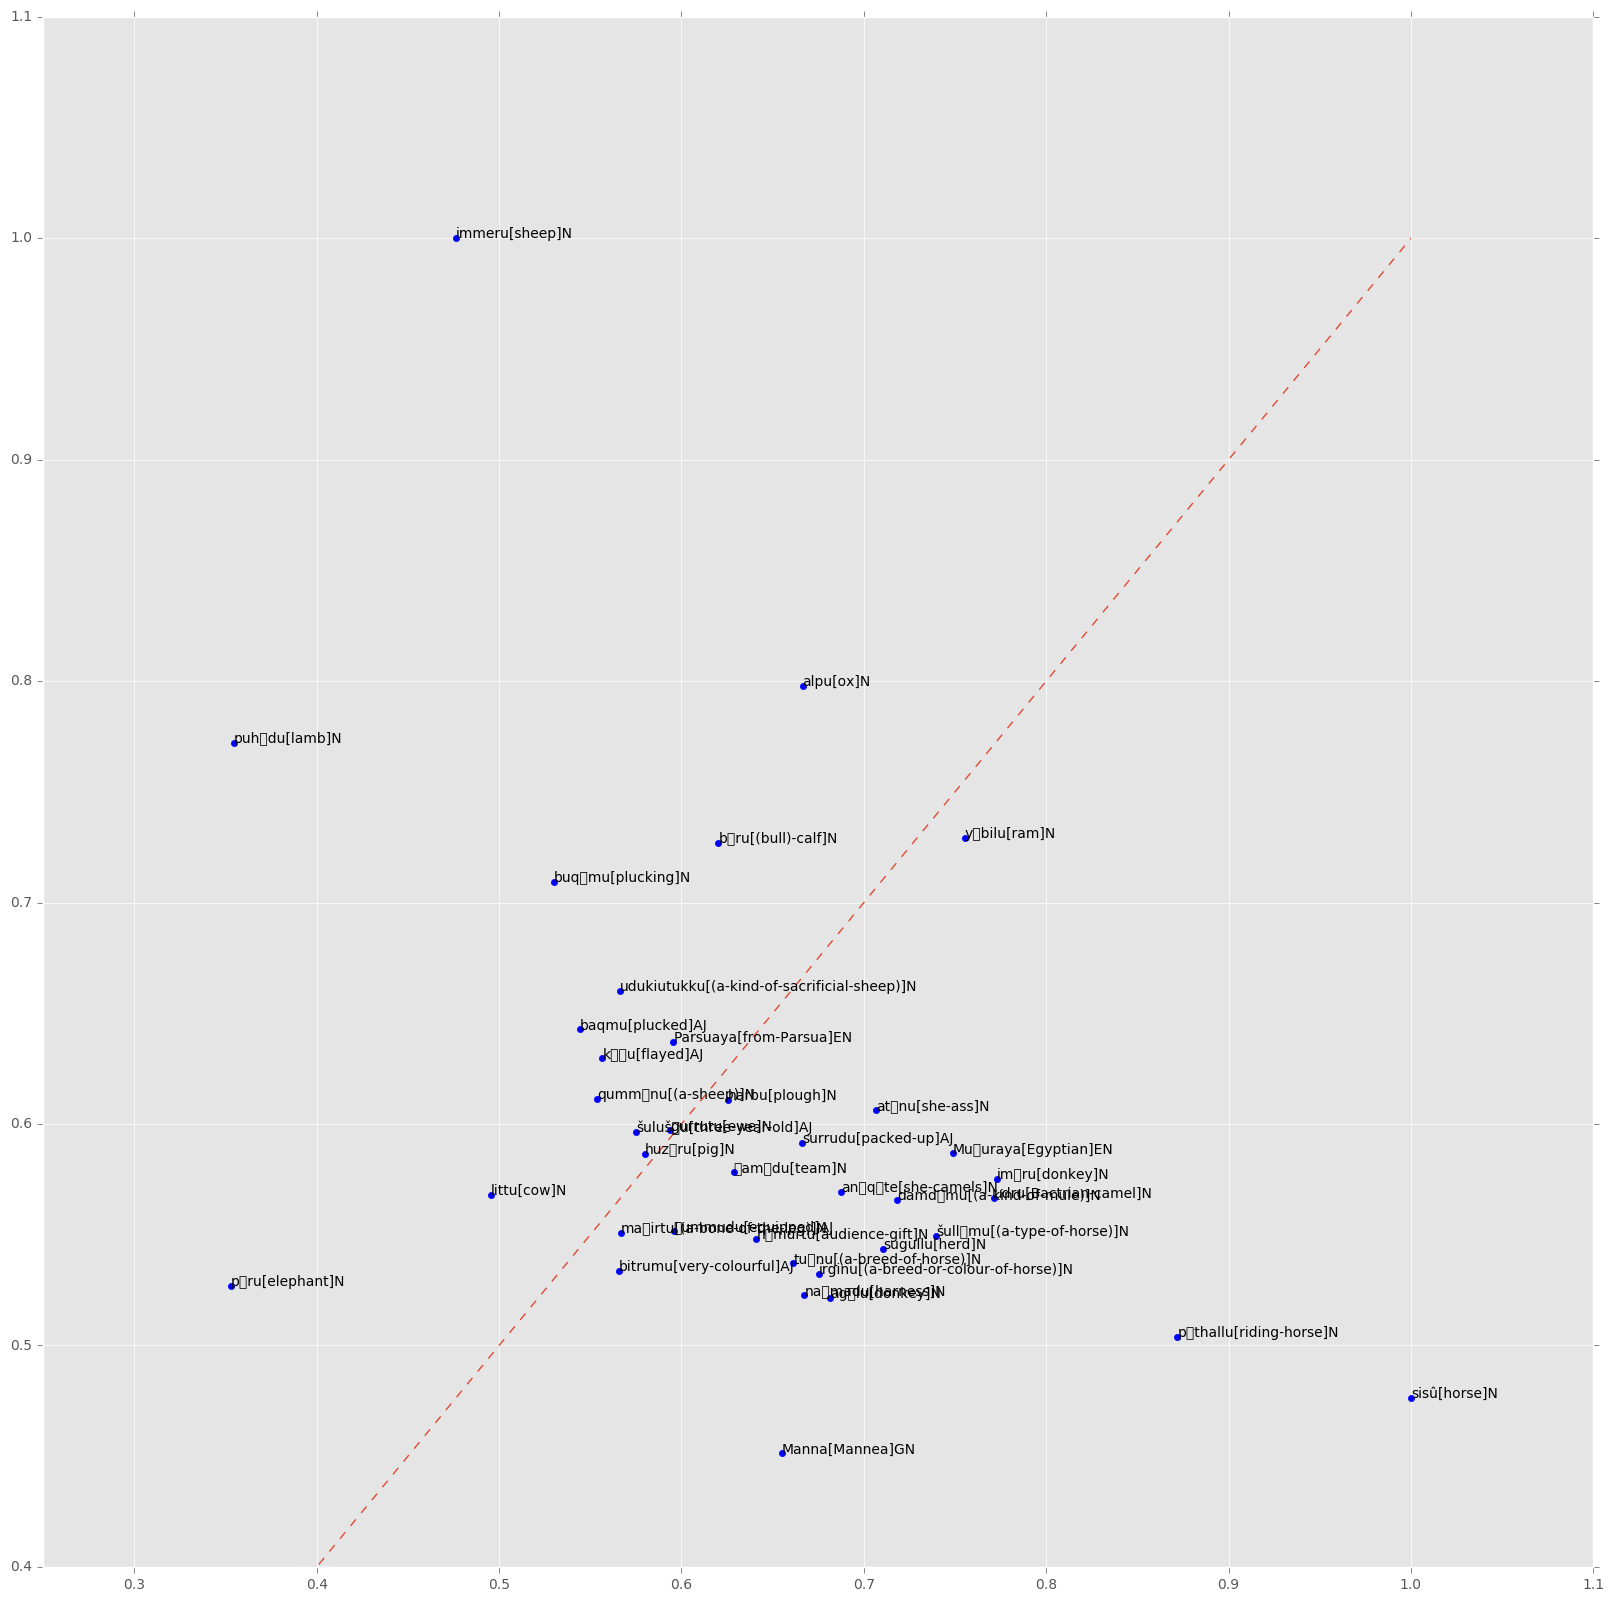

In [134]:
_, ax = plt.subplots(figsize=(20,20))
ax.scatter(x, y, alpha=1, color='b')
for i in range(len(animals)):
    ax.annotate(animals[i], (x[i], y[i]))
ax.set_xlim(.25, 1.1)
ax.set_ylim(.4, 1.1)
plt.plot([0, 1], [0, 1], linestyle='--');

In [112]:
intercept

0.7816531327751236